# How to write a C++ ROOTBook
<hr style="border-top-width: 4px; border-top-color: #34609b;">
In order to use a C++ [ROOT](root.cern.ch)book, just start the [ROOT kernel](https://github.com/root-mirror/root/tree/master/bindings/pyroot/JupyROOT/kernel). That's it. 
We will see also how the user can mark cells containing C++ statements with the **%%cpp** magic.

In [1]:
cout << "From this point on...\n" 
     << "... it's only C++ ..." << endl;

From this point on...
... it's only C++ ...


We now create a [ROOT histogram](https://root.cern.ch/doc/master/classTH1F.html) and fill it with [random numbers](https://root.cern.ch/doc/master/classTRandom.html) distributed according to a Gaussian.

In [2]:
TH1F h("gauss","Example histogram",64,-4,4);
h.FillRandom("gaus");

Now, we create a [canvas](https://root.cern.ch/doc/master/classTCanvas.html), the entity which holds graphics primitives.

In [3]:
TCanvas c("myCanvasName","The Canvas Title",1600,1200);
h.Draw()

For the histogram to be displayed in the notebook, we need to draw the canvas.

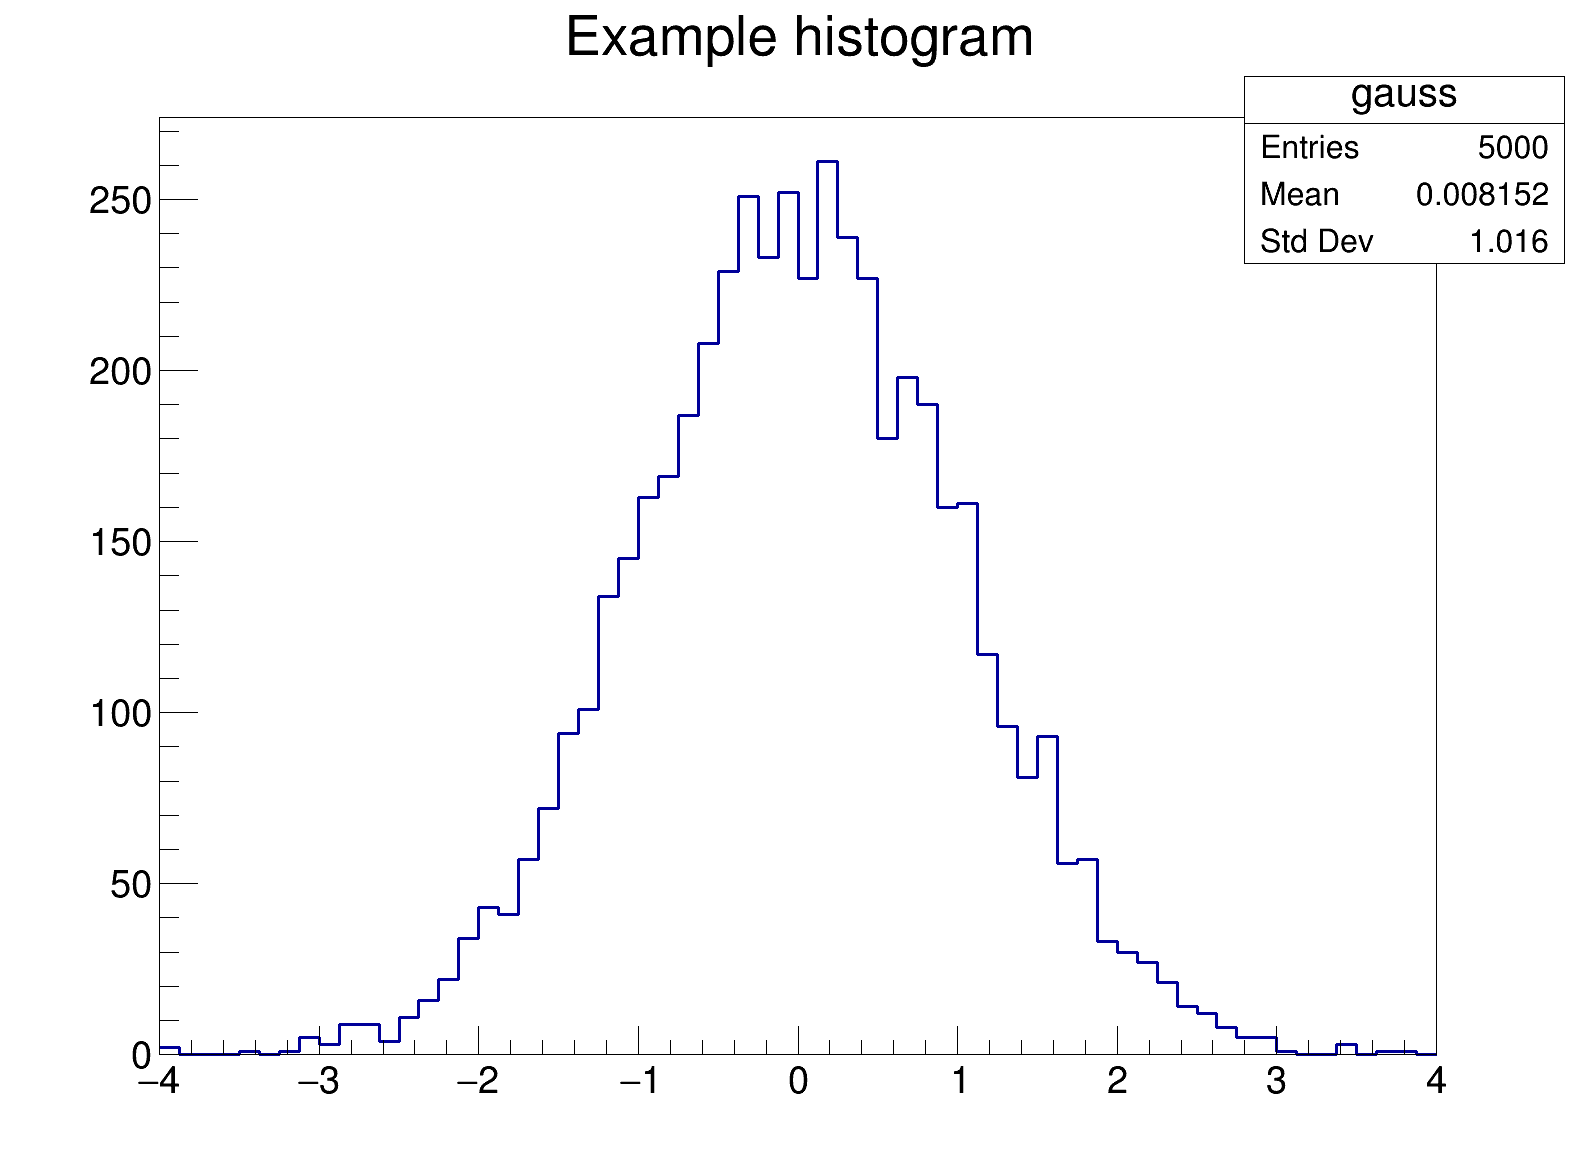

In [4]:
c.Draw()

Let's now fit the histogram.

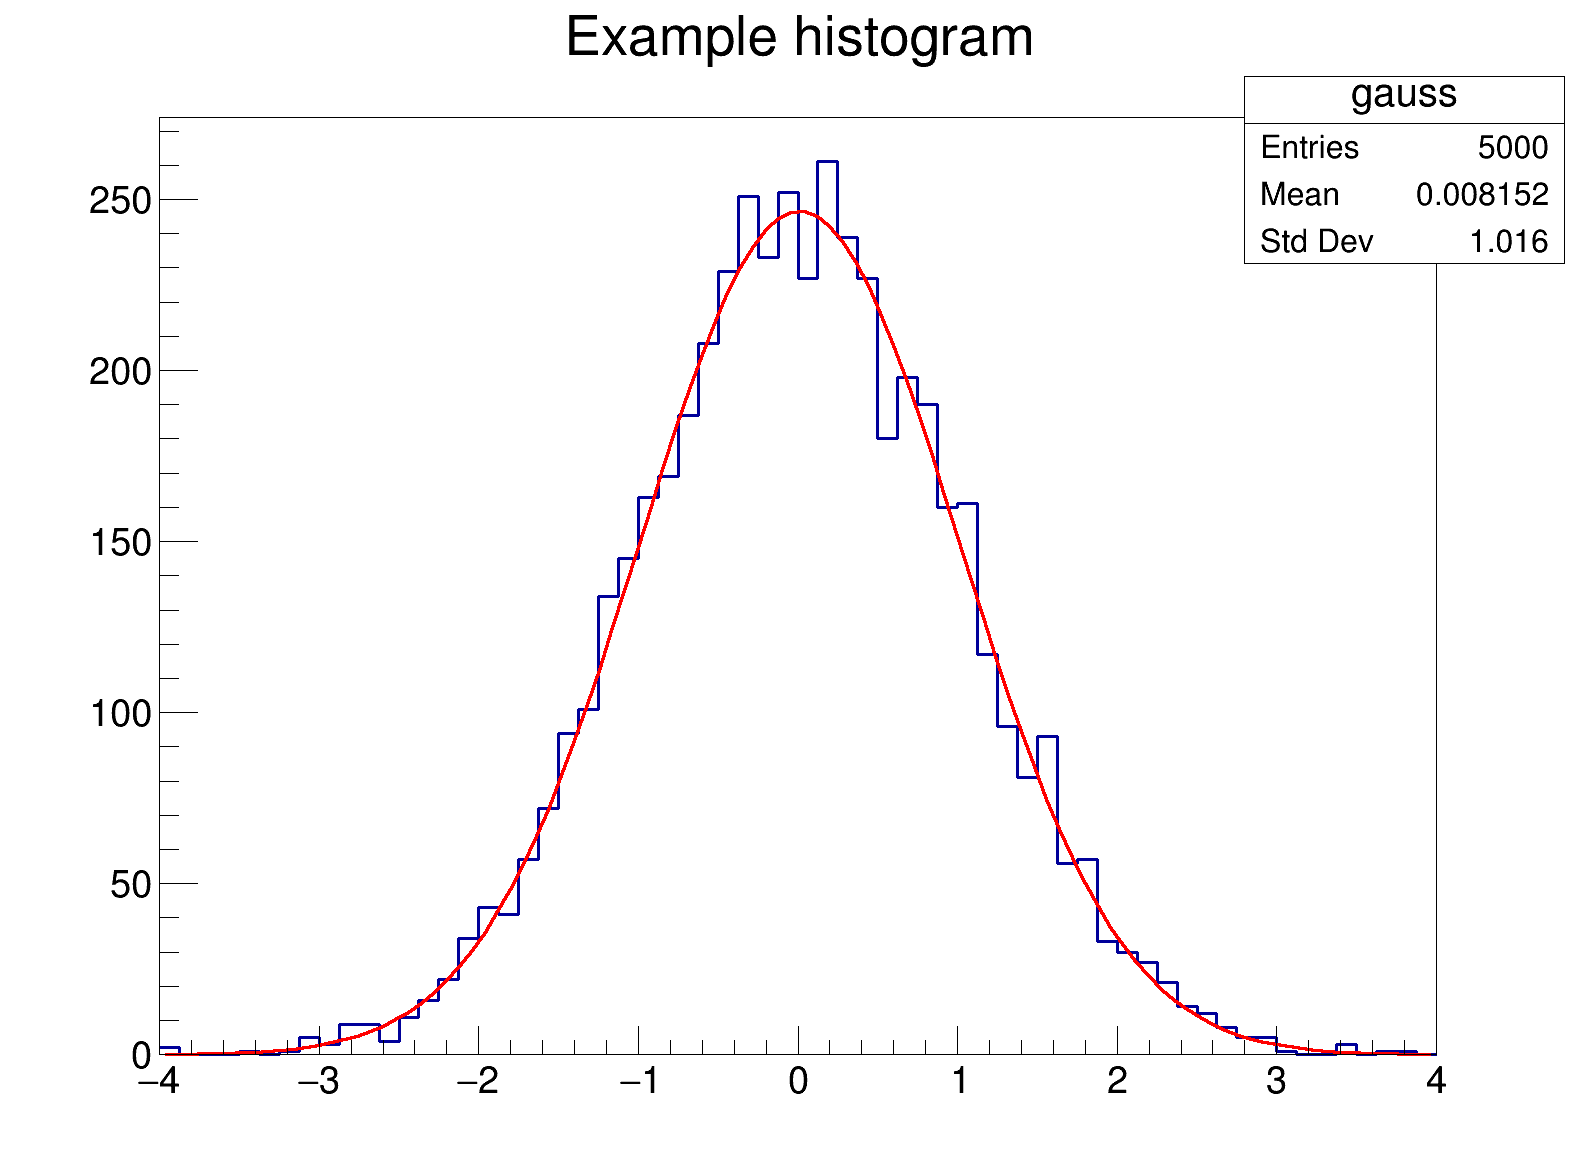

 FCN=47.4997 FROM MIGRAD    STATUS=CONVERGED      53 CALLS          54 TOTAL
                     EDM=8.44224e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.46469e+02   4.31494e+00   1.19094e-02  -2.44811e-05
   2  Mean         1.04782e-02   1.43576e-02   4.87656e-05  -6.34020e-03
   3  Sigma        1.00315e+00   1.03818e-02   9.45504e-06  -2.70309e-02


In [5]:
h.Fit("gaus", "S");
c.Draw();

Before moving forward, let's save our histogram on a file. All ROOT objects can be written to [ROOT files](https://root.cern.ch/doc/master/classTFile.html) out-of-the-box.

In [6]:
TFile outputFile("output.root","RECREATE");
h.Write();
outputFile.Close();

Let's check what is the content of the file with the [*rootls*](https://root.cern.ch/how/how-quickly-inspect-content-file) command line utility. A magic or the well known *.!* ROOT directive can be used.

In [7]:
%%shell
rootls -l output.root

TH1F  Jan 08 16:36  gauss  "Example histogram"



## And if I make a mistake? Diagnostics
Clang diagnostics are offered by ROOT, for example:

In [8]:
auto myHistoPtr = new TH1F();
myHistoPtr.Dump();

input_line_113:3:11: error: member reference type 'TH1F *' is a pointer; maybe you meant to use '->'?
myHistoPtr.Dump();
~~~~~~~~~~^
          ->


## Magics
It is possible to declare functions or to use ACLiC with the **%%cpp** magics.

### Declaration of functions
The **-d** option needs to be used when declaring functions: we must be explicit.

In [9]:
%%cpp -d
void f() {
    cout << "This is function f" << endl;
}

The value printing capabilities of ROOT are outstanding: you can inspect the code of a JIT-ted function from its name.

In [10]:
f

(void (*)()) Function @0x7fed99a9c080
  at :1:
void f() {
    cout << "This is function f" << endl;
}



### Advanced: ACliC
The **-a** allows to compile the cell code with ACLiC. This is not so relevant for performance since the ROOT interpreter just in time compiles the C++ code. Nevertheless, ACLiC is most useful when the automatic creation of dictionaries is required, for example in presence of I/O operations.

In [11]:
%%cpp -a
class A{};

Info in <TUnixSystem::ACLiC>: creating shared library /media/dpiparo/SSD/RootDevel/rootbinder/notebooks/b8651c13_C.so


Let's verify that the dictionary is there:

In [12]:
TClass::GetClass("A")->HasDictionary()

(Bool_t) true
